Loading data
=====================================================
We will work with "Parkinsons Telemonitoring" dataset of the University of Oxford. The original study used a range of linear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale

We load the dataset "Parkinsons Telemonitoring" using the numpy loadtxt function.

The columns are separated by ',' delimiter, which we pass to the loadtxt function.

In [1]:
# matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/artifical_lin.txt")

We want to work now with 2-dim data, in order to plot it in 3d space. Therefore we select 2 columns (attributes) from total of 12 columns.  

In this example we will select attributes "Clinician's motor UPDRS score" and "Clinician's total UPDRS score", which are 4th and 5th columns. 

In [3]:
X = data[:, :-1]
y = data[:, -1]
print(X[:10, :])
print(y[:10])

[[0.00747581 0.43208362]
 [0.49910584 0.20943748]
 [0.11935362 0.59634898]
 [0.47691878 0.91091956]
 [0.73039367 0.88576849]
 [0.96646013 0.75029941]
 [0.0254202  0.74285026]
 [0.17781366 0.59303845]
 [0.44925923 0.89314114]
 [0.08370431 0.26143735]]
[1.45054918 1.1025327  1.33827336 2.6022192  2.2101526  2.6110778
 1.71069895 2.23335293 3.10281928 0.86406978]


We shuffle examples:

In [4]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


/home/bushuhui/.virtualenv/fintech/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bushuhui/.virtualenv/fintech/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bushuhui/.virtualenv/fintech/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Now we split the data into train and test set:

In [7]:
train_set_size = int(X.shape[0] / 2)
print("train_set_size = %d " % train_set_size)

X_train = X[:train_set_size, :]  # selects first train_set_size rows (examples) for train set
X_test = X[train_set_size:, :]   # selects from row train_set_size until the last one for test set
print(X_train.shape)
print(X_test.shape)

train_set_size = 250 
(250, 2)
(250, 2)


And we split the targets into train and test set in similar way as we splitted data:

In [8]:
y_train = y[:train_set_size]   # selects first 15 rows (targets) for train set
y_test = y[train_set_size:]    # selects from row 250 until the last one for test set
print(y_train.shape)
print(y_test.shape)

(250,)
(250,)


Let's look at the data in the 3d plot. There is some linear relationship in the data:

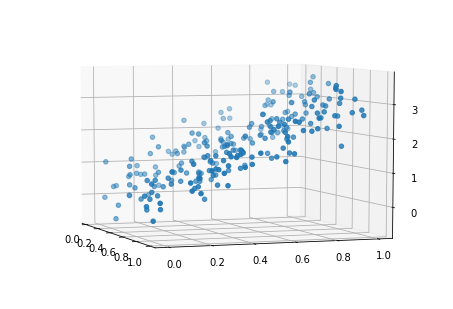

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_train[:500, 0], X_train[:500, 1], y_train[:500])
ax.view_init(6,-20)
plt.show()

Linear regression
=================
Create linear regression object, which we use later to apply linear regression on data

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


/home/bushuhui/.virtualenv/fintech/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Fit the model using the training set

In [11]:
regr.fit(X_train, y_train);

We found the coefficients and the bias (the intercept)

In [12]:
print(regr.coef_)
print(regr.intercept_)

[0.08241879 2.96344602]
0.09703581706766884


Now we calculate the mean square error on the test set

In [13]:
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))

Training error:  0.1527714636459691
Test     error:  0.16965042383819598


Plotting data and linear model
==============================
Now we want to plot the train data and teachers in 3d plot (marked as dots). 

With plane we represents the data and predictions (linear model that we found).

We first scatter the 3d points using mplot3d:


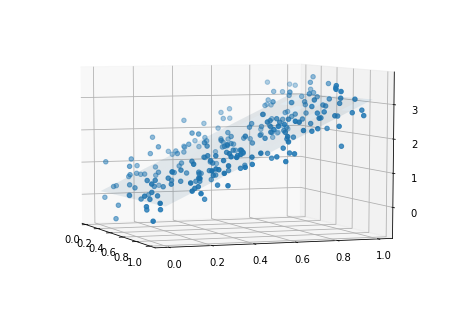

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter3D(X_train[:500, 0], X_train[:500, 1], y_train[:500])    # plots 3d points, 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=10)
range_y = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()


Now we plot the data and the plane in similar way for test data:

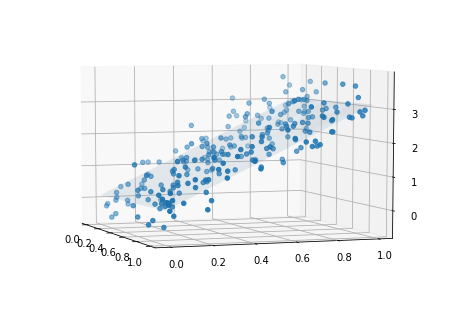

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_test[:500, 0], X_test[:500, 1], y_test[:500])    # plots 3d points 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), num=10)
range_y = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()


Playing with this Notebook
==========================

Do linear regression on dataset named 'artifical_lin".

Try to see what happens with the error, if you change the sizes of train set and test set. 

Add noise to the data, and fit the model again. How does the error changes when you add more noise?

You add noise using normal distribution, with mean 0 and width 0.4 (you can vary this parameters).
noise = np.random.normal(0,0.4, (train_set_size,2))

Add noise to data:
X = X + noise
